Mounted at /content/drive
🔎 Vista previa de la base de datos:
           NIT   Año  Ciudad   CIIU              DEP        AC         I  \
0  860067934.0  1995  BOGOTA  A0111           BOGOTA  239648.0       0.0   
1  890328003.0  1995    CALI  A0111  VALLE DEL CAUCA  682933.0  172732.0   
2  891302216.0  1995    CALI  A0111  VALLE DEL CAUCA  649461.0  380479.0   
3  800160353.0  1995    CALI  A0111  VALLE DEL CAUCA  768173.0  367162.0   
4  800063990.0  1995    CALI  A0111  VALLE DEL CAUCA  211551.0   17227.0   

          AF         AT         PN  ...       GV        GA      Imp       DyA  \
0   836854.0  1333751.0   664905.0  ...      0.0   74964.0  24625.0  186658.0   
1   363257.0  2955905.0  2881797.0  ...      0.0  300156.0  15967.0       NaN   
2   506443.0  1307972.0   845568.0  ...      0.0  134180.0   6916.0       NaN   
3  1550320.0  2402577.0  2379993.0  ...      0.0  159484.0  24250.0       NaN   
4  1123495.0  2149570.0   732193.0  ...  31916.0   70680.0  15121.0       Na

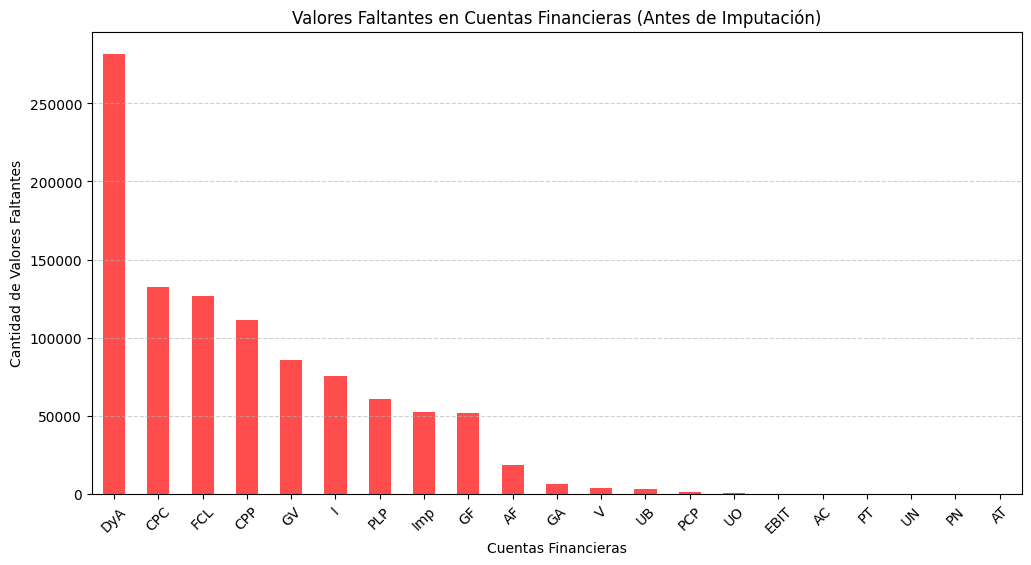


✅ Se imputaron con 0 las siguientes cuentas: ['I', 'CPC', 'CPP', 'PLP', 'GF', 'GV', 'GA', 'DyA', 'FCL']

✅ Se imputaron 15965 valores de `AF` con 0.

✅ Se imputaron 46323 valores de `Imp` con 0.

✅ Se imputaron 21 valores de `UN`.

✅ Se imputaron 155 valores de `EBIT`.

✅ Se imputaron 26 valores de `UB`.

✅ Se imputaron 3 valores de `UO`.

✅ Se imputaron 363 valores de `V`.

📊 Cantidad de valores faltantes después de la imputación:
Imp     6438
UB      3446
V       3352
AF      2318
PCP     1444
UO       363
AC       128
PT       125
EBIT      27
UN         6
AT         5
PN         5
I          0
CPP        0
CPC        0
PLP        0
GF         0
GV         0
GA         0
DyA        0
FCL        0
dtype: int64


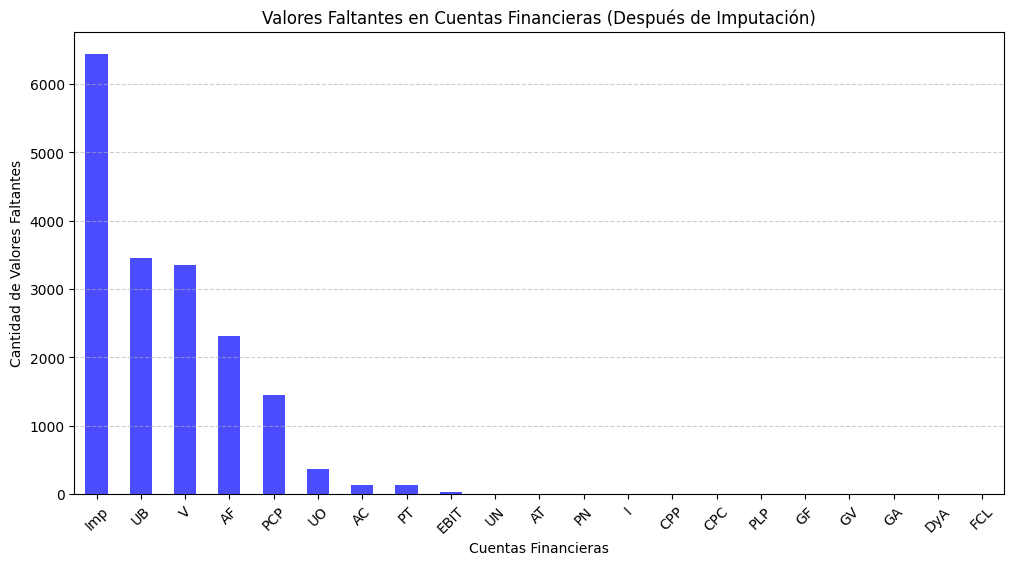


🔍 **Revisión de valores faltantes en `Imp` (Impuestos)**
🔸 Empresas sin `Imp`: 6438
🔹 De ellas, empresas con `V = 0` (sin ingresos): 26
🔹 De ellas, empresas con `EBIT < 0` (pérdidas): 0
🔹 Empresas que sí reportaron `Imp` en otros años: 4666

🔍 **Revisión de valores faltantes en `UB` (Utilidad Bruta)**
🔸 Empresas sin `UB`: 3446
🔹 De ellas, empresas con `V = 0`: 363
🔹 De ellas, empresas con `EBIT < 0`: 2321
🔹 Empresas que sí reportaron `UB` en otros años: 3323

🔍 **Revisión de valores faltantes en `V` (Ingresos)**
🔸 Empresas sin `V`: 3352
🔹 De ellas, empresas con `UB = 0`: 10
🔹 De ellas, empresas con `UO = 0`: 6
🔹 Empresas que sí reportaron `V` en otros años: 3219

🔍 **Revisión de valores faltantes en `AF` (Activos Fijos)**
🔸 Empresas sin `AF`: 2318
🔹 De ellas, empresas sin `DyA`: 0
🔹 Empresas que sí reportaron `AF` en otros años: 2130

🔍 **Revisión de valores faltantes en `PCP` (Pasivo Corriente)**
🔸 Empresas sin `PCP`: 1444
🔹 De ellas, empresas sin `PLP`: 0
🔹 Empresas que sí reportaro

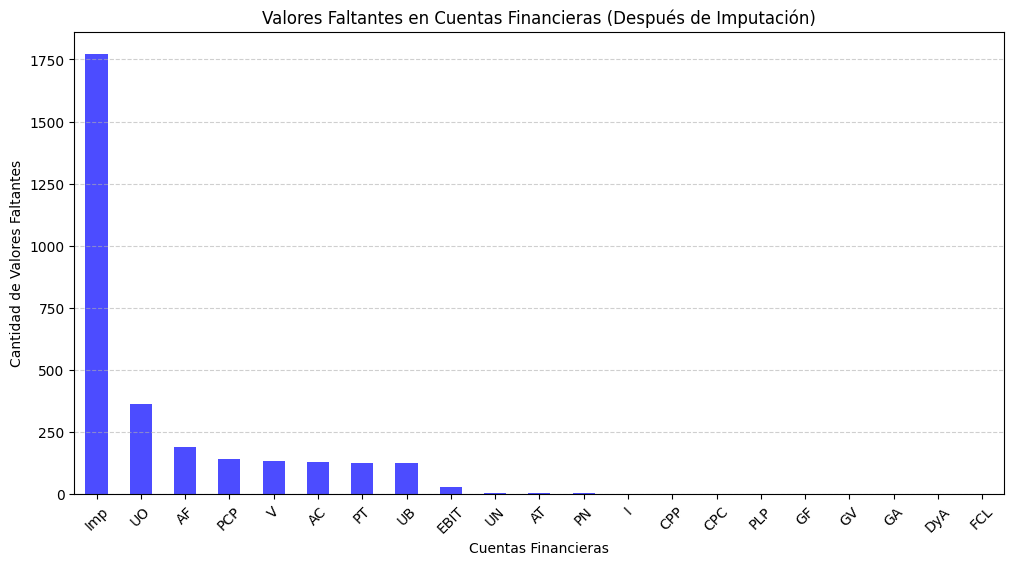

📊 Total de registros: 542069
📉 Registros con al menos un NaN: 2751
✅ Registros sin NaN (después de eliminar): 539318
📌 Porcentaje de registros con NaN: 0.51%

✅ Base de datos reducida a 539318 registros después de eliminar los NaN.

📊 Valores faltantes después de la conversión:
AC      0
AF      0
AT      0
PN      0
PCP     0
PT      0
UN      0
V       0
UB      0
EBIT    0
UO      0
Imp     0
dtype: int64

🔎 Información general después de la conversión:
<class 'pandas.core.frame.DataFrame'>
Index: 539318 entries, 105001 to 28032
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   NIT          539318 non-null  float64
 1   Año          539318 non-null  int64  
 2   Ciudad       539318 non-null  object 
 3   CIIU         539318 non-null  object 
 4   DEP          539318 non-null  object 
 5   AC           539318 non-null  float64
 6   I            539318 non-null  float64
 7   AF           539318 non-null  float64

In [1]:
# 📌 Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 📌 Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Para barras de progreso

# 📌 Definir la ruta del archivo Parquet
ruta_archivo = "/content/drive/MyDrive/Datos/4_Base_Ciudad_DEP_CIIU_Turismo.parquet"


# 📌 Cargar la base de datos
base_datos = pd.read_parquet(ruta_archivo)

# 📌 Vista previa de los primeros registros
print("🔎 Vista previa de la base de datos:")
print(base_datos.head())



# 📌 Definir las cuentas financieras clave
cuentas_financieras = [
    'AC', 'I', 'AF', 'AT', 'PN', 'PLP', 'PCP', 'PT', 'CPC', 'CPP',
    'UN', 'V', 'UB', 'EBIT', 'UO', 'GF', 'GV', 'GA', 'Imp', 'DyA', 'FCL'
]

# 📌 Resumen inicial de valores faltantes
faltantes_iniciales = base_datos[cuentas_financieras].isna().sum().sort_values(ascending=False)
print("\n📊 Cantidad de valores faltantes antes de la imputación:")
print(faltantes_iniciales)

# 📌 Visualización inicial de los valores faltantes
plt.figure(figsize=(12, 6))
faltantes_iniciales.plot(kind='bar', color='red', alpha=0.7)
plt.title("Valores Faltantes en Cuentas Financieras (Antes de Imputación)")
plt.xlabel("Cuentas Financieras")
plt.ylabel("Cantidad de Valores Faltantes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 📌 1️⃣ Imputación con ceros (Cuentas sin reporte pueden asumirse como 0)
# 🔹 Se imputarán con 0 las cuentas que tienen sentido que sean 0 si no fueron reportadas.
# 🔹 Criterios:
#    ✅ Inventarios (`I`): Si no están reportados, asumimos que la empresa no tiene inventarios.
#    ✅ Cuentas por cobrar (`CPC`) y Cuentas por pagar (`CPP`): Si no están, asumimos que no existen.
#    ✅ Pasivo no corriente (`PLP`): Si falta, asumimos que no tiene pasivos a largo plazo.
#    ✅ Gastos financieros (`GF`), Gastos de ventas (`GV`) y Gastos administrativos (`GA`): Si no aparecen, asumimos que la empresa no incurrió en esos costos.
#    ✅ Depreciaciones y Amortizaciones (`DyA`): Si no aparecen, asumimos que no hay activos fijos depreciables.
#    ✅ Flujo de caja libre (`FCL`): Si no hay valores reportados, asumimos que no hubo movimientos de efectivo.

cuentas_imputar_ceros = ['I', 'CPC', 'CPP', 'PLP', 'GF', 'GV', 'GA', 'DyA', 'FCL']
base_datos[cuentas_imputar_ceros] = base_datos[cuentas_imputar_ceros].fillna(0)

print("\n✅ Se imputaron con 0 las siguientes cuentas:", cuentas_imputar_ceros)

# 📌 2️⃣ Imputación de `AF` (Activos Fijos)
# 🔹 Si `AF` (activos fijos) está NaN y `DyA` (depreciaciones) también es NaN o 0, se asume que la empresa no tiene activos fijos.
condicion_af = (base_datos['AF'].isna()) & (base_datos['DyA'].isna() | (base_datos['DyA'] == 0))
base_datos.loc[condicion_af, 'AF'] = 0
print(f"\n✅ Se imputaron {condicion_af.sum()} valores de `AF` con 0.")

# 📌 3️⃣ Imputación de `Imp` (Impuestos)
# 🔹 Si una empresa no reportó `Imp`, verificamos condiciones para asignar 0:
#    ✅ Si `EBIT < 0`, la empresa tuvo pérdidas y no pagó impuestos.
#    ✅ Si `V = 0`, la empresa no tuvo ingresos, por lo que no debió pagar impuestos.
#    ✅ Si `UN` es NaN o `UN = 0`, no se generó utilidad para pagar impuestos.
#    ✅ Si la empresa reportó impuestos en el siguiente año, asumimos que solo se postergó el pago.

# 📌 Optimización: Revisar empresas con `Imp` faltante en el siguiente año
base_datos = base_datos.sort_values(by=["NIT", "Año"])
base_datos["Imp_siguiente_anio"] = base_datos.groupby("NIT")["Imp"].shift(-1).notna()
empresas_con_imp_siguiente_anio = base_datos[(base_datos["Imp"].isna()) & (base_datos["Imp_siguiente_anio"])]["NIT"].unique()

# 📌 Aplicar imputación de `Imp`
condicion_imp = (base_datos['Imp'].isna()) & (
    (base_datos['EBIT'] < 0) | (base_datos['V'] == 0) |
    (base_datos['UN'].isna()) | (base_datos['UN'] == 0) |
    (base_datos['NIT'].isin(empresas_con_imp_siguiente_anio))
)
base_datos.loc[condicion_imp, 'Imp'] = 0
print(f"\n✅ Se imputaron {condicion_imp.sum()} valores de `Imp` con 0.")

# 📌 4️⃣ Imputación de `UN` (Utilidad Neta)
# 🔹 `UN` representa la utilidad neta después de impuestos.
# 🔹 Si `UN` es NaN, verificamos:
#    ✅ Si la empresa no tuvo ingresos (`V = 0`), su utilidad neta debe ser 0.
#    ✅ Si la empresa tuvo pérdidas (`EBIT < 0`) y `Imp` ya es 0, entonces `UN = EBIT`.
#    ✅ Si `EBIT` y `Imp` están presentes, imputamos `UN = EBIT - Imp`.

condicion_un_1 = (base_datos['UN'].isna()) & (base_datos['V'] == 0)
base_datos.loc[condicion_un_1, 'UN'] = 0

condicion_un_2 = (base_datos['UN'].isna()) & (base_datos['EBIT'] < 0) & (base_datos['Imp'] == 0)
base_datos.loc[condicion_un_2, 'UN'] = base_datos['EBIT']

condicion_un_3 = (base_datos['UN'].isna()) & (~base_datos['EBIT'].isna()) & (~base_datos['Imp'].isna())
base_datos.loc[condicion_un_3, 'UN'] = base_datos['EBIT'] - base_datos['Imp']

print(f"\n✅ Se imputaron {condicion_un_1.sum() + condicion_un_2.sum() + condicion_un_3.sum()} valores de `UN`.")

# 📌 5️⃣ Imputación de `EBIT` (Utilidad Antes de Impuestos)
# 🔹 `EBIT` es la utilidad antes de impuestos, clave en el cálculo contable.
# 🔹 Si `EBIT` es NaN, verificamos:
#    ✅ Si `V = 0`, entonces no hay actividad y `EBIT = 0`.
#    ✅ Si `UN` y `Imp` están presentes, imputamos `EBIT = UN + Imp`.

condicion_ebit_1 = (base_datos['EBIT'].isna()) & (base_datos['V'] == 0)
base_datos.loc[condicion_ebit_1, 'EBIT'] = 0

condicion_ebit_2 = (base_datos['EBIT'].isna()) & (~base_datos['UN'].isna()) & (~base_datos['Imp'].isna())
base_datos.loc[condicion_ebit_2, 'EBIT'] = base_datos['UN'] + base_datos['Imp']

print(f"\n✅ Se imputaron {condicion_ebit_1.sum() + condicion_ebit_2.sum()} valores de `EBIT`.")

# 📌 6️⃣ Imputación de `UB` (Utilidad Bruta)
# 🔹 `UB` mide la ganancia después de restar costos directos.
# 🔹 Si `UB` es NaN, verificamos:
#    ✅ Si `V = 0`, entonces `UB = 0`.
#    ✅ Si `GV` y `GA` están presentes, imputamos `UB = V - GV - GA`.

condicion_ub_1 = (base_datos['UB'].isna()) & (base_datos['V'] == 0)
base_datos.loc[condicion_ub_1, 'UB'] = 0

condicion_ub_2 = (base_datos['UB'].isna()) & (~base_datos['V'].isna()) & (~base_datos['GV'].isna()) & (~base_datos['GA'].isna())
base_datos.loc[condicion_ub_2, 'UB'] = base_datos['V'] - base_datos['GV'] - base_datos['GA']

print(f"\n✅ Se imputaron {condicion_ub_1.sum() + condicion_ub_2.sum()} valores de `UB`.")

# 📌 7️⃣ Imputación de `UO` (Utilidad Operacional)
# 🔹 `UO` mide la utilidad después de gastos administrativos.
# 🔹 Si `UO` es NaN, verificamos:
#    ✅ Si `V = 0`, entonces `UO = 0`.
#    ✅ Si `UB`, `GA` y `GF` están presentes, imputamos `UO = UB - GA - GF`.

condicion_uo_1 = (base_datos['UO'].isna()) & (base_datos['V'] == 0)
base_datos.loc[condicion_uo_1, 'UO'] = 0

condicion_uo_2 = (base_datos['UO'].isna()) & (~base_datos['UB'].isna()) & (~base_datos['GA'].isna()) & (~base_datos['GF'].isna())
base_datos.loc[condicion_uo_2, 'UO'] = base_datos['UB'] - base_datos['GA'] - base_datos['GF']

print(f"\n✅ Se imputaron {condicion_uo_1.sum() + condicion_uo_2.sum()} valores de `UO`.")

# 📌 8️⃣ Imputación de `V` (Ingresos)
# 🔹 `V` representa los ingresos totales.
# 🔹 Si `V` es NaN, verificamos:
#    ✅ Si `UB` y `UO` son NaN, entonces `V = 0`.

condicion_v = (base_datos['V'].isna()) & (base_datos['UB'].isna()) & (base_datos['UO'].isna())
base_datos.loc[condicion_v, 'V'] = 0

print(f"\n✅ Se imputaron {condicion_v.sum()} valores de `V`.")

# 📌 Resumen final de valores faltantes después de imputación
faltantes_finales = base_datos[cuentas_financieras].isna().sum().sort_values(ascending=False)
print("\n📊 Cantidad de valores faltantes después de la imputación:")
print(faltantes_finales)

# 📌 Visualización final de valores faltantes
plt.figure(figsize=(12, 6))
faltantes_finales.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Valores Faltantes en Cuentas Financieras (Después de Imputación)")
plt.xlabel("Cuentas Financieras")
plt.ylabel("Cantidad de Valores Faltantes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 📌 Revisión de valores faltantes en las cuentas restantes

# 📌 1️⃣ Análisis de `Imp` (Impuestos)
print("\n🔍 **Revisión de valores faltantes en `Imp` (Impuestos)**")
sin_imp = base_datos[base_datos['Imp'].isna()]
print(f"🔸 Empresas sin `Imp`: {len(sin_imp)}")
print(f"🔹 De ellas, empresas con `V = 0` (sin ingresos): {sum(sin_imp['V'] == 0)}")
print(f"🔹 De ellas, empresas con `EBIT < 0` (pérdidas): {sum(sin_imp['EBIT'] < 0)}")
print(f"🔹 Empresas que sí reportaron `Imp` en otros años: {sum(base_datos.groupby('NIT')['Imp'].transform(lambda x: x.notna().sum() > 0)[sin_imp.index])}")

# 📌 2️⃣ Análisis de `UB` (Utilidad Bruta)
print("\n🔍 **Revisión de valores faltantes en `UB` (Utilidad Bruta)**")
sin_ub = base_datos[base_datos['UB'].isna()]
print(f"🔸 Empresas sin `UB`: {len(sin_ub)}")
print(f"🔹 De ellas, empresas con `V = 0`: {sum(sin_ub['V'] == 0)}")
print(f"🔹 De ellas, empresas con `EBIT < 0`: {sum(sin_ub['EBIT'] < 0)}")
print(f"🔹 Empresas que sí reportaron `UB` en otros años: {sum(base_datos.groupby('NIT')['UB'].transform(lambda x: x.notna().sum() > 0)[sin_ub.index])}")

# 📌 3️⃣ Análisis de `V` (Ingresos)
print("\n🔍 **Revisión de valores faltantes en `V` (Ingresos)**")
sin_v = base_datos[base_datos['V'].isna()]
print(f"🔸 Empresas sin `V`: {len(sin_v)}")
print(f"🔹 De ellas, empresas con `UB = 0`: {sum(sin_v['UB'] == 0)}")
print(f"🔹 De ellas, empresas con `UO = 0`: {sum(sin_v['UO'] == 0)}")
print(f"🔹 Empresas que sí reportaron `V` en otros años: {sum(base_datos.groupby('NIT')['V'].transform(lambda x: x.notna().sum() > 0)[sin_v.index])}")

# 📌 4️⃣ Análisis de `AF` (Activos Fijos)
print("\n🔍 **Revisión de valores faltantes en `AF` (Activos Fijos)**")
sin_af = base_datos[base_datos['AF'].isna()]
print(f"🔸 Empresas sin `AF`: {len(sin_af)}")
print(f"🔹 De ellas, empresas sin `DyA`: {sum(sin_af['DyA'].isna())}")
print(f"🔹 Empresas que sí reportaron `AF` en otros años: {sum(base_datos.groupby('NIT')['AF'].transform(lambda x: x.notna().sum() > 0)[sin_af.index])}")

# 📌 5️⃣ Análisis de `PCP` (Pasivo Corriente)
print("\n🔍 **Revisión de valores faltantes en `PCP` (Pasivo Corriente)**")
sin_pcp = base_datos[base_datos['PCP'].isna()]
print(f"🔸 Empresas sin `PCP`: {len(sin_pcp)}")
print(f"🔹 De ellas, empresas sin `PLP`: {sum(sin_pcp['PLP'].isna())}")
print(f"🔹 Empresas que sí reportaron `PCP` en otros años: {sum(base_datos.groupby('NIT')['PCP'].transform(lambda x: x.notna().sum() > 0)[sin_pcp.index])}")

# 📌 Imputación simplificada basada en reportes en otros años

# 1️⃣ Imputación de `Imp` (Impuestos)
# 🔹 Si la empresa sí reportó `Imp` en otros años, pero este año está en NaN, se imputa con 0.
base_datos.loc[(base_datos['Imp'].isna()) & (base_datos.groupby('NIT')['Imp'].transform(lambda x: x.notna().sum()) > 0), 'Imp'] = 0

# 2️⃣ Imputación de `UB` (Utilidad Bruta)
# 🔹 Si la empresa sí reportó `UB` en otros años, pero este año está en NaN, se imputa con 0.
base_datos.loc[(base_datos['UB'].isna()) & (base_datos.groupby('NIT')['UB'].transform(lambda x: x.notna().sum()) > 0), 'UB'] = 0

# 3️⃣ Imputación de `V` (Ingresos)
# 🔹 Si la empresa sí reportó `V` en otros años, pero este año está en NaN, se imputa con 0.
base_datos.loc[(base_datos['V'].isna()) & (base_datos.groupby('NIT')['V'].transform(lambda x: x.notna().sum()) > 0), 'V'] = 0

# 4️⃣ Imputación de `AF` (Activos Fijos)
# 🔹 Si la empresa sí reportó `AF` en otros años, pero este año está en NaN, se imputa con 0.
base_datos.loc[(base_datos['AF'].isna()) & (base_datos.groupby('NIT')['AF'].transform(lambda x: x.notna().sum()) > 0), 'AF'] = 0

# 5️⃣ Imputación de `PCP` (Pasivo Corriente)
# 🔹 Si la empresa sí reportó `PCP` en otros años, pero este año está en NaN, se imputa con 0.
base_datos.loc[(base_datos['PCP'].isna()) & (base_datos.groupby('NIT')['PCP'].transform(lambda x: x.notna().sum()) > 0), 'PCP'] = 0

# 📌 Verificación final de valores faltantes después de imputación
faltantes_finales = base_datos[['Imp', 'UB', 'V', 'AF', 'PCP']].isna().sum()
print("\n📊 Valores faltantes después de la última imputación:")
print(faltantes_finales)


# 📌 Resumen final de valores faltantes después de imputación
faltantes_finales = base_datos[cuentas_financieras].isna().sum().sort_values(ascending=False)
print("\n📊 Cantidad de valores faltantes después de la imputación:")
print(faltantes_finales)

# 📌 Visualización final de valores faltantes
plt.figure(figsize=(12, 6))
faltantes_finales.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Valores Faltantes en Cuentas Financieras (Después de Imputación)")
plt.xlabel("Cuentas Financieras")
plt.ylabel("Cantidad de Valores Faltantes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 📌 Optimización: Contar registros con al menos un NaN sin recorrer fila por fila
total_registros = len(base_datos)

# Contar cuántos registros tienen al menos un NaN en las cuentas financieras
registros_con_nan = base_datos[cuentas_financieras].isna().sum(axis=1).gt(0).sum()

# Calcular porcentaje y registros sin NaN
porcentaje_nan = (registros_con_nan / total_registros) * 100
registros_sin_nan = total_registros - registros_con_nan

# Mostrar resultados
print(f"📊 Total de registros: {total_registros}")
print(f"📉 Registros con al menos un NaN: {registros_con_nan}")
print(f"✅ Registros sin NaN (después de eliminar): {registros_sin_nan}")
print(f"📌 Porcentaje de registros con NaN: {porcentaje_nan:.2f}%")


base_datos = base_datos.dropna(subset=cuentas_financieras)
print(f"\n✅ Base de datos reducida a {len(base_datos)} registros después de eliminar los NaN.")

# 📌 Eliminar la columna auxiliar
base_datos.drop(columns=['Imp_siguiente_anio'], inplace=True)

# 📌 Convertir columnas financieras a numérico (forzando conversión y manejando errores)
columnas_numericas = [
    'AC', 'AF', 'AT', 'PN', 'PCP', 'PT', 'UN', 'V', 'UB', 'EBIT', 'UO', 'Imp'
]

for col in columnas_numericas:
    base_datos[col] = pd.to_numeric(base_datos[col], errors='coerce')  # Convierte y pone NaN si hay errores

# 📌 Verificar si hay valores NaN después de la conversión
valores_faltantes = base_datos[columnas_numericas].isna().sum()
print("\n📊 Valores faltantes después de la conversión:")
print(valores_faltantes)

# 📌 Mostrar un resumen actualizado
print("\n🔎 Información general después de la conversión:")
print(base_datos.info())


# 📌 Definir la ruta para guardar la base de datos en formato Parquet
ruta_guardado_parquet = "/content/drive/MyDrive/Datos/5_Base_Imputadas_Cuentas.parquet"


# 📌 Guardar en formato Parquet (sin índice)
base_datos.to_parquet(ruta_guardado_parquet, index=False)
print(f"\n✅ Base de datos guardada en formato Parquet en: {ruta_guardado_parquet}")
# 📌 Optimización: Contar registros con al menos un NaN sin recorrer fila por fila
total_registros = len(base_datos)

# Contar cuántos registros tienen al menos un NaN en las cuentas financieras
registros_con_nan = base_datos[cuentas_financieras].isna().sum(axis=1).gt(0).sum()

# Calcular porcentaje y registros sin NaN
porcentaje_nan = (registros_con_nan / total_registros) * 100
registros_sin_nan = total_registros - registros_con_nan

# Mostrar resultados
print(f"📊 Total de registros: {total_registros}")
print(f"📉 Registros con al menos un NaN: {registros_con_nan}")
print(f"✅ Registros sin NaN (después de eliminar): {registros_sin_nan}")
print(f"📌 Porcentaje de registros con NaN: {porcentaje_nan:.2f}%")
# 📄 Crear resumen del paso 5
ruta_resumen = "/content/drive/MyDrive/Datos/5_resumen.txt"

resumen_txt = f"""
📄 Script: 5_Imputacion_Cuentas_Financieras.ipynb
📅 Fecha: {pd.Timestamp.today().strftime('%Y-%m-%d')}
🧩 Objetivo: Imputar valores faltantes en cuentas contables clave y eliminar registros incompletos.

🔁 Pasos realizados:
- Imputación con 0 según lógica contable en 9 cuentas clave
- Imputación condicional de AF, Imp, UN, EBIT, UB, UO, V
- Revisión cruzada de reportes en otros años para completar valores faltantes
- Eliminación de registros con al menos un NaN residual
- Conversión de columnas a tipo numérico

📦 Archivo generado:
- 5_Base_Imputadas_Cuentas.parquet

📊 Estadísticas finales:
- Registros finales: {len(base_datos)}
- NITs únicos: {base_datos['NIT'].nunique()}
- Porcentaje de registros eliminados: {porcentaje_nan:.2f}%
- Columnas financieras imputadas: {len(cuentas_financieras)}

🆔 Ejemplos de NITs: {', '.join(base_datos['NIT'].dropna().astype(str).unique()[:10])}
📅 Años presentes: {', '.join(map(str, sorted(base_datos['Año'].dropna().unique())[:10]))}

📋 Columnas imputadas:
""" + "\n".join([f"   • {col}" for col in cuentas_financieras])

# Guardar resumen
with open(ruta_resumen, "w", encoding="utf-8") as f:
    f.write(resumen_txt.strip())

print(f"\n📝 Resumen guardado en: {ruta_resumen}")
